In [90]:
from pylab import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import time
from scipy.misc import imread
from scipy.misc import imresize
import matplotlib.image as mpimg
from scipy.ndimage import filters
import urllib
from numpy import random
import sys
import pickle
import os
from scipy.io import loadmat
# Load the MNIST digit data
M = loadmat("mnist_all.mat")

In [91]:
def softmax(y):
    '''Return the output of the softmax function for the matrix of output y. y
    is an NxM matrix where N is the number of outputs for a single case, and M
    is the number of cases'''
    return exp(y) / tile(sum(exp(y), 0), (len(y), 1))
def cost_function(y, p):
    return -np.nansum(y * np.log(p))

In [92]:
def part2(x, W0, b0):
    #print(b0.shape, W0.shape)
    total_W0 = np.concatenate((b0, W0))
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    vals = softmax(np.dot(total_W0.T, total_x))
    return vals.T

def part3(x, y1, p):
    deriv = np.subtract(p, y1)
    added_ones = np.ones(x.shape[1]).reshape(x.shape[1], 1)
    total_x = np.concatenate((added_ones.T, x))
    deriv = np.matmul(deriv.T, total_x.T).T
    return deriv  # shape 10, 785

In [93]:
def get_data(M):
    train_keys = [key for key in M.keys() if "train" in key]
    data_length = 0
    for train_k in train_keys:
        data_length += M[train_k].shape[0]

    # concatenate all the data
    train_data = np.zeros((data_length, 784))
    data_counter = 0
    data_size = 0

    train_y = np.zeros((data_length, 10))
    for i, train_k in enumerate(train_keys):
        data_size = M[train_k].shape[0]
        #print(i, data_size)
        train_data[data_counter: data_counter + data_size, :] = M[train_k]
        train_y[data_counter: data_counter + data_size, i] = 1
        data_counter += data_size
    return train_data, train_y

In [95]:
x, y = get_data(M)
x = x.T/255./255.

In [94]:
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
weights[0, :10]

(784, 10) (1, 10)


array([  7.69994424e+03,   2.37933647e+06,   4.68478987e+06,
         9.74509781e+05,   1.91209977e+06,   1.33066817e+07,
         1.44363967e+06,   5.09049281e+06,  -2.31239779e+07,
        -6.67536215e+06])

In [96]:
ind1 = 300
ind2 = 400
fine_grain = 30
print(weights[ind1, 5], weights[ind2, 5])
range_val = 150.
vary_w1 = np.linspace(weights[ind1, 5]- range_val, weights[ind1, 5]+range_val, fine_grain*2)
vary_w2 = np.linspace(weights[ind2, 5]- range_val, weights[ind2, 5]+range_val, fine_grain*2)
print(vary_w1, vary_w2)

-1008.09306929 -520.779415229
[-1158.09306929 -1153.00832352 -1147.92357776 -1142.838832   -1137.75408624
 -1132.66934047 -1127.58459471 -1122.49984895 -1117.41510318 -1112.33035742
 -1107.24561166 -1102.1608659  -1097.07612013 -1091.99137437 -1086.90662861
 -1081.82188285 -1076.73713708 -1071.65239132 -1066.56764556 -1061.48289979
 -1056.39815403 -1051.31340827 -1046.22866251 -1041.14391674 -1036.05917098
 -1030.97442522 -1025.88967946 -1020.80493369 -1015.72018793 -1010.63544217
 -1005.55069641 -1000.46595064  -995.38120488  -990.29645912  -985.21171335
  -980.12696759  -975.04222183  -969.95747607  -964.8727303   -959.78798454
  -954.70323878  -949.61849302  -944.53374725  -939.44900149  -934.36425573
  -929.27950996  -924.1947642   -919.11001844  -914.02527268  -908.94052691
  -903.85578115  -898.77103539  -893.68628963  -888.60154386  -883.5167981
  -878.43205234  -873.34730657  -868.26256081  -863.17781505  -858.09306929] [-670.77941523 -665.69466947 -660.6099237  -655.52517794 -

In [97]:
start = time.time()
contour = np.zeros((fine_grain*2, fine_grain*2))
for i in range(fine_grain*2):
    for j in range(fine_grain*2):
        weights[ind1, 5] = vary_w1[i]
        weights[ind2, 5] = vary_w2[j]
        output2 = part2(x, weights, weights_bias)
        cost2 = cost_function(y, output2)     
        contour[i, j] = cost2
    if (i%10 ==9):
        print(i)
end = time.time()
print("Time taken: {0}".format(end - start))
np.savetxt("big_contour.txt", contour)

/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


9
19
29
39
49
59
Time taken: 1122.5970313549042


In [98]:
def df(x, W0, y):
    # this W0 is assumed to have the bias incorperated into it
    #print(W0.shape, y.shape)
    W1, b0 = W0[:-1, :].reshape(784, W0.shape[1]), W0[-1, :].reshape(1, 10)
    vals = part2(x, W1, b0)
    return part3(x, y, vals)

(60,) (60, 60)


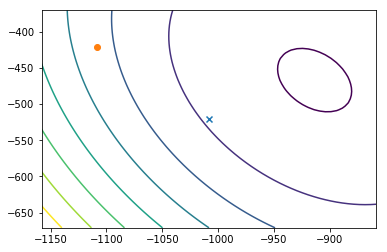

In [99]:
#reload teh weights here, they get overwritten
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
#print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
#weights[0, :10]

contour = np.loadtxt("big_contour.txt")
print(vary_w1.shape, contour.shape)
plt.contour(vary_w1, vary_w2, contour)
#plt.scatter()
plt.scatter(weights[ind1, 5], weights[ind2, 5], marker = "x")
plt.scatter(weights[ind1, 5]-100, weights[ind2, 5]+100)

plt.show()

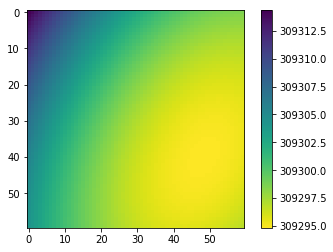

In [100]:
#print(contour)
plt.scatter(weights[ind1, 5], weights[ind2, 5])
plt.imshow(contour, cmap = "viridis_r")
plt.colorbar()
plt.show()

-978.093069287 -580.779415229
(784, 10)
Iter 25
Time taken: 9.63418984413147
[-978.09306929 -985.39121077 -963.23353148 -974.29348528 -950.64803393
 -966.92200014 -943.20297646 -960.36053803 -937.62262136 -953.30114755
 -932.25028636 -945.63635448 -926.85703976 -937.41094898 -921.12693043
 -928.90418983 -915.26472462 -920.21786842 -908.87853537 -911.90069253
 -902.69197651 -904.25946689 -896.87133863 -897.23962419 -891.17667051
 -890.76832103]
[-580.77941523 -590.4132668  -546.33452455 -558.23432642 -513.39430224
 -528.73639214 -485.17024283 -501.65679038 -461.59911694 -478.13391592
 -442.57862319 -458.06768846 -427.48175697 -440.97696636 -415.6801237
 -426.67623289 -406.72626099 -414.65569367 -399.20843498 -404.3075714
 -392.33013116 -395.42615133 -386.033711   -387.59595812 -380.08551396
 -380.47862826]
-1008.09306929


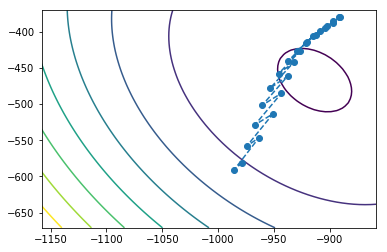

In [103]:
#use vanilla gradient descent
def grad_descent_learning_curves(df, x, y, weights, b0, alpha, ind1, ind2, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=30
    W0[ind2 , 5] -=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 25
    iter = 0

    weight1= np.zeros(max_iter+1)
    weight2 = np.zeros(max_iter+1)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        
        temp = alpha * df(x, W1, y)
        #print(temp.shape)
        #print(temp[ind1+1, 5], temp[ind2+1, 5])
        #print(temp.shape)
        #W1[ind1 +1, 5] -= temp[ind1+1, 5]
        #W1[ind2 +1, 5] -= temp[ind2+1, 5]
        W1 -=temp
        weight1[counter] = W1[ind1+1, 5]s
        weight2[counter] = W1[ind2+1, 5]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)   
        iter += 1
        #break
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2
    


np.random.seed(0)
alpha = 25
final_weights, weight1, weight2 = grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 1e-4)
print(weight1)
print(weight2)

print(weights[ind1, 5])
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='o',)
plt.show()

-978.093069287 -580.779415229
(784, 10)
Iter 20
Time taken: 7.868653297424316
[-980.05077192 -981.6453611  -981.74768106 -979.80302252 -975.89096574
 -970.45285831 -964.12644461 -957.6205882  -951.53442144 -946.19620323
 -941.62443873 -937.61648268 -933.91812584 -930.35170449 -926.80987765
 -923.28150728 -919.83885567 -916.58683324 -913.60810109 -910.92016688]
[-583.11083148 -584.9357428  -584.26971196 -579.91034811 -571.80827956
 -560.74311543 -547.90634439 -534.55115251 -521.82443274 -510.4557639
 -500.56997807 -491.85259412 -483.82809462 -476.06705698 -468.36455136
 -460.7053354  -453.20223072 -446.01488791 -439.28212758 -433.07286477]


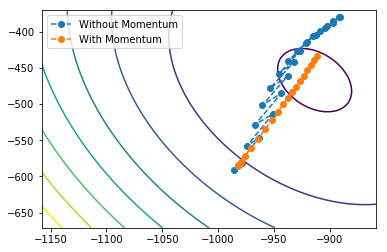

In [106]:
def momemtum_grad_descent_learning_curves(df, x, y, W0, b0, alpha, ind1, ind2, momemtum = 0.9, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=30
    W0[ind2 , 5] -=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 20
    iter = 0
    
    weight1= np.zeros(max_iter)
    weight2 = np.zeros(max_iter)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    
    counter = 0
    new_momentum = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        new_momentum = momemtum*new_momentum + alpha* df(x, W1, y)
        W1 -= new_momentum
        weight1[counter] = W1[ind1+1 , 5]
        weight2[counter] = W1[ind2+1, 5 ]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)

        iter += 1
        
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2


np.random.seed(0)
alpha = 4
final_weights, weight3, weight4 = momemtum_grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 0.79, 1e-4)
print(weight3)
print(weight4)

plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='o', label = "Without Momentum")
plt.plot(weight3, weight4, linestyle='--', marker='o', label = "With Momentum")
plt.legend(numpoints = 1)
plt.show()

In [125]:
#find settings that dont work, use a edge point
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
weights[0, :10]

ind1 = 159
ind2 = 160
fine_grain = 30
print(weights[ind1, 5], weights[ind2, 5])
range_val = 150.
vary_w1 = np.linspace(weights[ind1, 5]- range_val, weights[ind1, 5]+range_val, fine_grain*2)
vary_w2 = np.linspace(weights[ind2, 5]- range_val, weights[ind2, 5]+range_val, fine_grain*2)
print(vary_w1, vary_w2)

(784, 10) (1, 10)
587.345667193 -509.378726309
[ 437.34566719  442.43041296  447.51515872  452.59990448  457.68465024
  462.76939601  467.85414177  472.93888753  478.02363329  483.10837906
  488.19312482  493.27787058  498.36261635  503.44736211  508.53210787
  513.61685363  518.7015994   523.78634516  528.87109092  533.95583668
  539.04058245  544.12532821  549.21007397  554.29481974  559.3795655
  564.46431126  569.54905702  574.63380279  579.71854855  584.80329431
  589.88804007  594.97278584  600.0575316   605.14227736  610.22702313
  615.31176889  620.39651465  625.48126041  630.56600618  635.65075194
  640.7354977   645.82024346  650.90498923  655.98973499  661.07448075
  666.15922651  671.24397228  676.32871804  681.4134638   686.49820957
  691.58295533  696.66770109  701.75244685  706.83719262  711.92193838
  717.00668414  722.0914299   727.17617567  732.26092143  737.34566719] [-659.37872631 -654.29398055 -649.20923478 -644.12448902 -639.03974326
 -633.9549975  -628.87025173 -

In [126]:
start = time.time()
contour = np.zeros((fine_grain*2, fine_grain*2))
for i in range(fine_grain*2):
    for j in range(fine_grain*2):
        weights[ind1, 5] = vary_w1[i]
        weights[ind2, 5] = vary_w2[j]
        output2 = part2(x, weights, weights_bias)
        cost2 = cost_function(y, output2)     
        contour[i, j] = cost2
    if (i%10 ==9):
        print(i)
end = time.time()
print("Time taken: {0}".format(end - start))
np.savetxt("big_contour_2.txt", contour)

/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: divide by zero encountered in log
/home/naireen/anaconda2/envs/CSC401/lib/python3.6/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in multiply


9
19
29
39
49
59
Time taken: 1238.1766610145569


[ 309310.78260226  309310.37382673  309309.97236774  309309.57823083
  309309.1914215   309308.81194509  309308.43980688  309308.07501201
  309307.71756552  309307.36747235]
(60,) (60, 60)


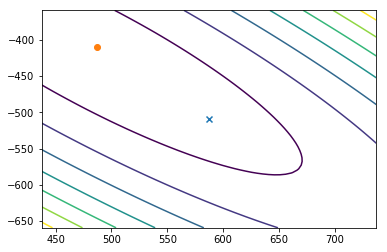

In [127]:
#reload teh weights here, they get overwritten
weights = np.loadtxt("final_weightspart5.txt")
weights_bias = weights[-1, :].reshape(1, 10)
weights = weights[:-1, :]
#print(weights.shape, weights_bias.shape), #alter, (300, 400) 5
#weights[0, :10]

contour = np.loadtxt("big_contour_2.txt")
print(contour[0, :10])
print(vary_w1.shape, contour.shape)
plt.contour(vary_w1, vary_w2, contour)
#plt.scatter()
plt.scatter(weights[ind1, 5], weights[ind2, 5], marker = "x")
plt.scatter(weights[ind1, 5]-100, weights[ind2, 5]+100)

plt.show()

687.345667193 -449.378726309
(784, 10)
Iter 25
Time taken: 18.707828521728516
[ 687.34566719  656.84809353  689.55991281  656.37009594  696.24519087
  657.7240218   698.57524908  660.31223763  698.49653545  662.48952504
  696.24879524  663.2173192   691.92183779  662.90927696  686.00443818
  661.46388556  678.9012655   658.88682328  670.88888167  655.03217864
  662.83006576  650.01297054  654.95538996  644.48231987  647.42700976
  638.63753854]
[-449.37872631 -469.18358471 -440.78614677 -463.14080371 -429.4767057
 -457.08601607 -422.90372792 -450.95137582 -419.13722816 -445.73648427
 -417.78165972 -442.40278919 -418.47825364 -440.2337082  -420.61328579
 -439.16764905 -424.1321232  -439.12006143 -428.59368938 -440.16866377
 -432.81507659 -441.87173557 -436.80406721 -444.01141315 -440.56129172
 -446.45575725]
587.345667193


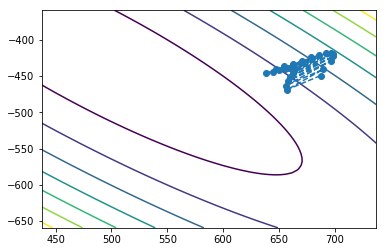

In [130]:
#use vanilla gradient descent
def grad_descent_learning_curves(df, x, y, weights, b0, alpha, ind1, ind2, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=100
    W0[ind2 , 5] +=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 25
    iter = 0

    weight1= np.zeros(max_iter+1)
    weight2 = np.zeros(max_iter+1)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        
        temp = alpha * df(x, W1, y)
        #print(temp.shape)
        #print(temp[ind1+1, 5], temp[ind2+1, 5])
        #print(temp.shape)
        #W1[ind1 +1, 5] -= temp[ind1+1, 5]
        #W1[ind2 +1, 5] -= temp[ind2+1, 5]
        W1 -=temp
        weight1[counter] = W1[ind1+1, 5]
        weight2[counter] = W1[ind2+1, 5]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)   
        iter += 1
        #break
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2
    


np.random.seed(0)
alpha = 25
final_weights, weight1, weight2 = grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 1e-4)
print(weight1)
print(weight2)

print(weights[ind1, 5])
plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='o',)
plt.show()

687.345667193 -449.378726309
(784, 10)
Iter 20
Time taken: 14.384055376052856
[ 681.67605541  674.21003889  667.72214154  663.85982519  663.0256048
  664.70169653  667.83986579  671.32608962  674.1846888   675.89833745
  676.49721658  676.38715131  676.0547541   675.84881592  675.94649099
  676.29815335  676.72156327  676.97104943  676.83496839  676.2211208 ]
[-453.33750365 -458.23284544 -462.0501003  -463.62774848 -462.76540827
 -459.89956231 -455.87531649 -451.56024987 -447.72743909 -444.85565731
 -442.96034536 -441.73151757 -440.78111014 -439.82672971 -438.72088319
 -437.49488462 -436.28162336 -435.24664829 -434.51612909 -434.13356455]


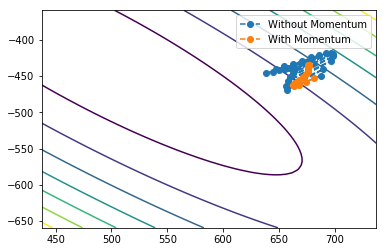

In [131]:
def momemtum_grad_descent_learning_curves(df, x, y, W0, b0, alpha, ind1, ind2, momemtum = 0.9, EPS=1e-7):
    # EPS = 1e-5   #EPS = 10**(-5)
    
    W0 = weights.copy()
    start = time.time()
    W0[ind1, 5] +=100
    W0[ind2 , 5] +=60
    print(W0[ind1 , 5], W0[ind2, 5])
    total_W0 = np.concatenate((b0, W0))
    prev_totalW0 = total_W0 - 10 * EPS
    W1 = total_W0.copy()
    # inital weights, pass in both bias and weights together for now
    max_iter = 20
    iter = 0
    
    weight1= np.zeros(max_iter)
    weight2 = np.zeros(max_iter)
    print(W0.shape)
    weight1[0] = W0[ind1, 5]
    weight2[0] = W0[ind2, 5]
    counter = 1
    
    counter = 0
    new_momentum = 1
    while norm(W1 - prev_totalW0) > EPS and iter < max_iter:
        prev_totalW0 = W1.copy()
        new_momentum = momemtum*new_momentum + alpha* df(x, W1, y)
        W1 -= new_momentum
        weight1[counter] = W1[ind1+1 , 5]
        weight2[counter] = W1[ind2+1, 5 ]
        counter +=1
        if iter % 100 == 99:
            print("Iter", iter)

        iter += 1
        
    print("Iter", iter)
    end = time.time()
    print("Time taken:", (end - start))
    return W1, weight1, weight2


np.random.seed(0)
alpha = 4
final_weights, weight3, weight4 = momemtum_grad_descent_learning_curves(df, x, y, weights, weights_bias, alpha, ind1, ind2, 0.79, 1e-4)
print(weight3)
print(weight4)

plt.contour(vary_w1, vary_w2, contour)
plt.plot(weight1, weight2, linestyle='--', marker='o', label = "Without Momentum")
plt.plot(weight3, weight4, linestyle='--', marker='o', label = "With Momentum")
plt.legend(numpoints = 1)
plt.show()